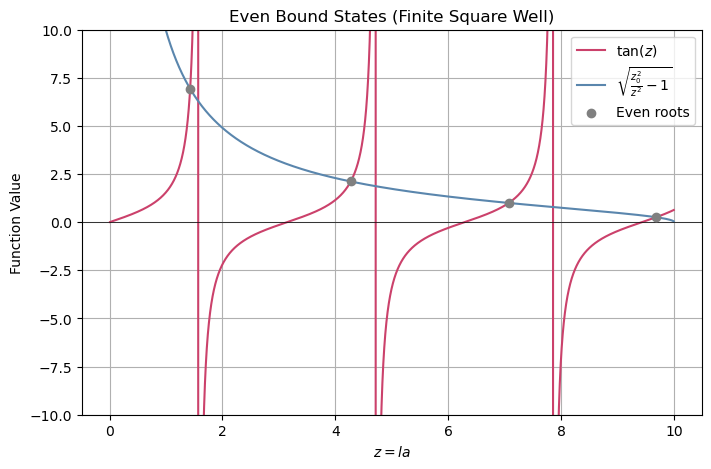

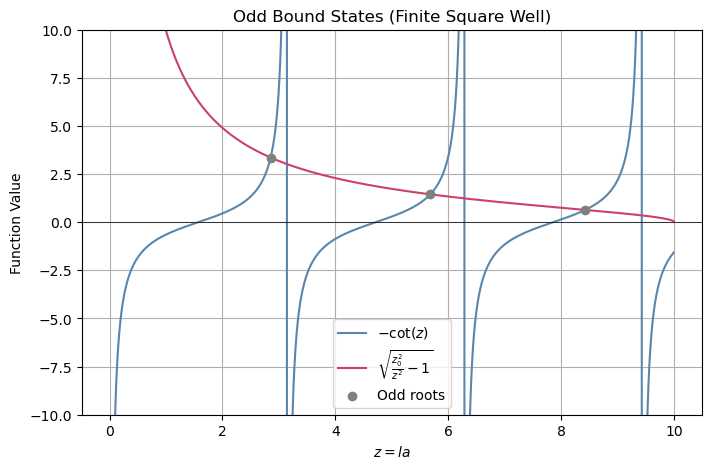

Even bound state z-values: [1.4278 1.5705 4.2714 4.7125 7.0691 7.8536 9.6791]
Odd bound state z-values: [2.8521 3.1415 5.6797 6.2836 8.4235 9.4246]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

z0 = 10
z = np.linspace(0.01, z0 - 0.01, 10000)

lhs_even = np.tan(z)
rhs_even = np.sqrt((z0**2)/(z**2) - 1) 

lhs_odd = -1/(np.tan(z))
rhs_odd = np.sqrt((z0**2)/(z**2) - 1) 

# find intersection points
def find_intersections(f1, f2, z_vals):
    diff = f1 - f2
    sign_change = np.where(np.diff(np.sign(diff)))[0]
    roots = []
    for idx in sign_change:
        z_root = (z_vals[idx] + z_vals[idx + 1]) / 2  # Midpoint estimate
        roots.append(z_root)
    return roots

even_roots = find_intersections(lhs_even, rhs_even, z)
odd_roots = find_intersections(lhs_odd, rhs_odd, z)

# Plot even case
plt.figure(figsize=(8, 5))
plt.plot(z, lhs_even, label=r'$\tan(z)$', color = '#cb416b')
plt.plot(z, rhs_even, label=r'$\sqrt{\frac{z_0^2}{z^2} - 1}$', color = '#5a86ad')
plt.scatter(even_roots, [np.tan(r) for r in even_roots], color='grey', zorder=5, label='Even roots')
plt.title('Even Bound States (Finite Square Well)')
plt.xlabel(r'$z = la$')
plt.ylabel('Function Value')
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# Plot odd case
plt.figure(figsize=(8, 5))
plt.plot(z, lhs_odd, label=r'$-\cot(z)$', color='#5a86ad')
plt.plot(z, rhs_odd, label=r'$\sqrt{\frac{z_0^2}{z^2} - 1}$', color = '#cb416b')
plt.scatter(odd_roots, [-1/(np.tan(r)) for r in odd_roots], color='grey', zorder=5, label='Odd roots')
plt.title('Odd Bound States (Finite Square Well)')
plt.xlabel(r'$z = la$')
plt.ylabel('Function Value')
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# Print root values
print("Even bound state z-values:", np.round(even_roots, 4))
print("Odd bound state z-values:", np.round(odd_roots, 4))

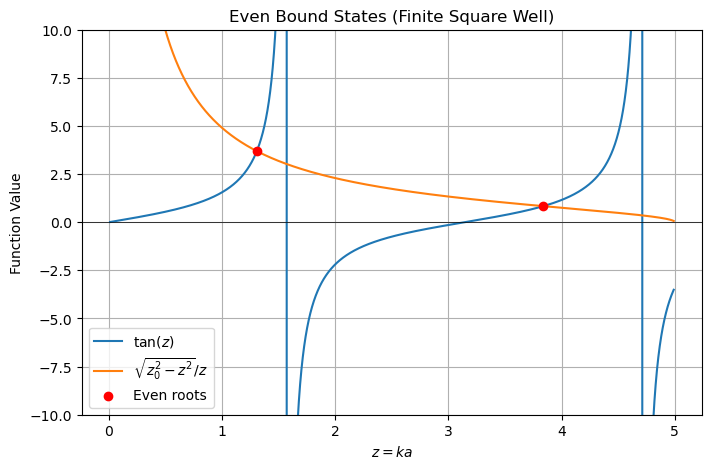

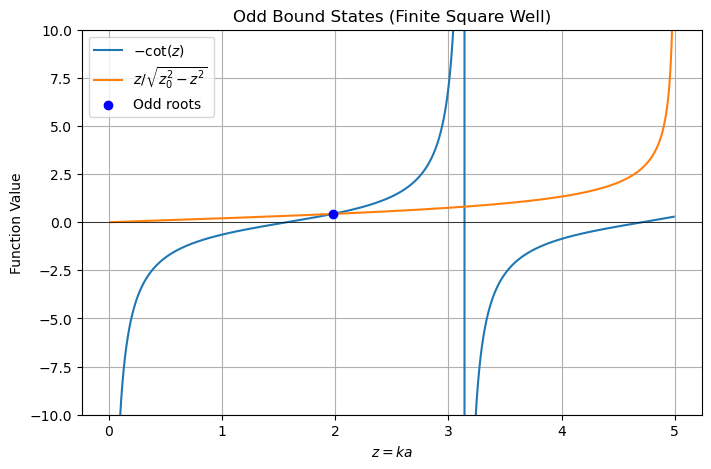

Even bound state z-values: [1.3067 1.5706 3.8373 4.7123]
Odd bound state z-values: [1.9775 3.1415]


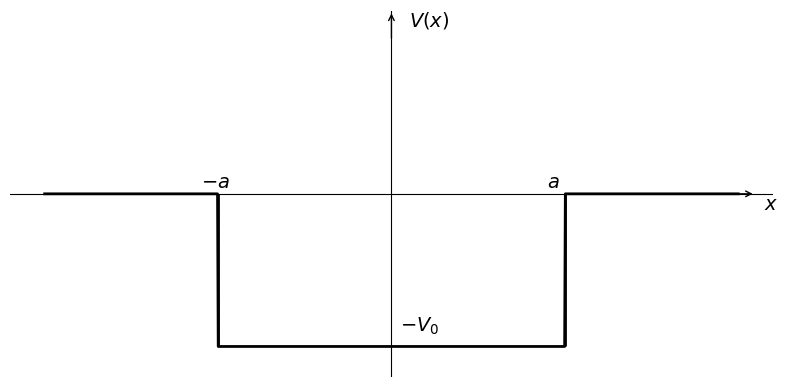

In [15]:
import numpy as np
import matplotlib.pyplot as plt

a = 1       # Half-width of the well
V0 = 50     # Well depth

x_vals = np.linspace(-2*a, 2*a, 1000)
V_vals = np.where(np.abs(x_vals) < a, -V0, 0)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x_vals, V_vals, color='black', linewidth=2)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.annotate('', xy=(2.1, 0), xytext=(1.9, 0), arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate('', xy=(0, 60), xytext=(0, 50), arrowprops=dict(arrowstyle='->', color='black'))
plt.text(2.15, -5, r'$x$', fontsize=14)
plt.text(0.1, 55, r'$V(x)$', fontsize=14)
plt.text(0.05, -V0 + 5, r'$-V_0$', fontsize=14)
plt.text(-a - 0.1, 2, r'$-a$', fontsize=14)
plt.text(a - 0.1, 2, r'$a$', fontsize=14)
plt.vlines([-a, a], ymin=-V0, ymax=0, color='black', linewidth=2)
plt.xlim(-2.2*a, 2.2*a)
plt.ylim(-1.2*V0, 60)
plt.axis('off') 
plt.tight_layout()
plt.show()



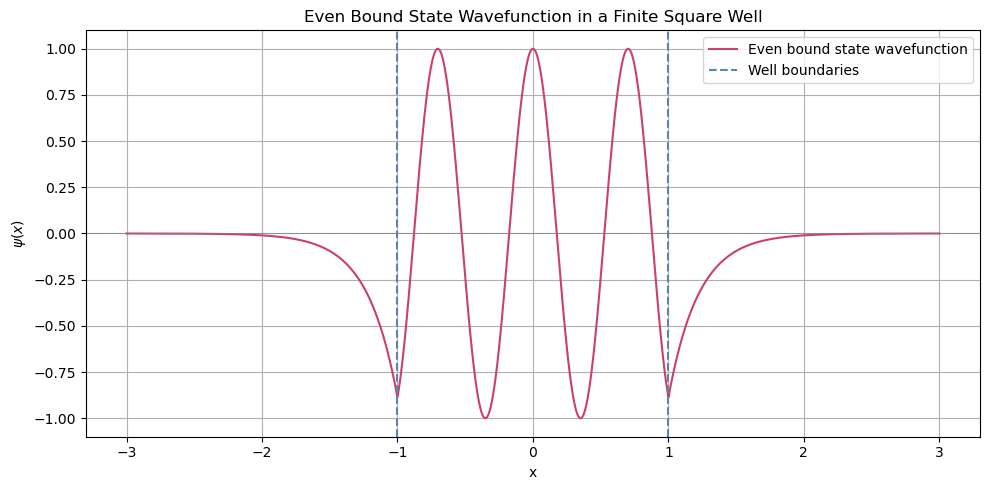

In [28]:
import numpy as np
import matplotlib.pyplot as plt

a = 1         # half-width of the well
V0 = 50       # depth of the well
E = -10       # bound state energy (must be < 0 and > -V0)
m = 1         # particle mass
hbar = 1      # reduced Planck constant
k = np.sqrt(2 * m * (E + V0)) / hbar
kappa = np.sqrt(2 * m * (-E)) / hbar

# even bound state wavefunction
def psi_even(x):
    if np.abs(x) < a:
        return np.cos(k * x)
    elif x >= a:
        return np.cos(k * a) * np.exp(-kappa * (x - a))
    else:
        return np.cos(k * a) * np.exp(kappa * (x + a))

x_vals = np.linspace(-3 * a, 3 * a, 1000)
psi_vals = np.array([psi_even(x) for x in x_vals])

# plotting
plt.figure(figsize=(10, 5))
plt.plot(x_vals, psi_vals, label='Even bound state wavefunction', color='#cb416b')
plt.axvline(-a, color='#5a86ad', linestyle='--', label='Well boundaries')
plt.axvline(a, color='#5a86ad', linestyle='--')
plt.axhline(0, color='grey', linewidth=0.5)
plt.title('Even Bound State Wavefunction in a Finite Square Well')
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



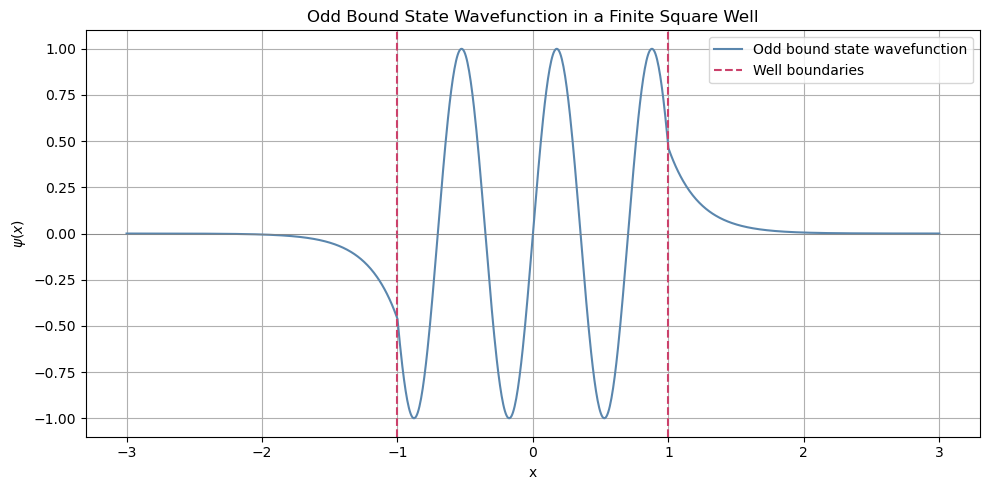

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1         # half-width of the well
V0 = 50       # depth of the well
E = -10       # bound state energy (must be < 0 and > -V0)
m = 1         # particle mass
hbar = 1      # Planck constant
k = np.sqrt(2 * m * (E + V0)) / hbar
kappa = np.sqrt(2 * m * (-E)) / hbar

# odd bound state wavefunction
def psi_odd(x):
    if np.abs(x) < a:
        return np.sin(k * x)
    elif x >= a:
        return np.sign(x) * np.sin(k * a) * np.exp(-kappa * (x - a))
    else:
        return -np.sin(k * a) * np.exp(kappa * (x + a))

x_vals = np.linspace(-3 * a, 3 * a, 1000)
psi_vals = np.array([psi_odd(x) for x in x_vals])

# plotting
plt.figure(figsize=(10, 5))
plt.plot(x_vals, psi_vals, label='Odd bound state wavefunction', color='#5a86ad')
plt.axvline(-a, color='#cb416b', linestyle='--', label='Well boundaries')
plt.axvline(a, color='#cb416b', linestyle='--')
plt.axhline(0, color='grey', linewidth=0.5)
plt.title('Odd Bound State Wavefunction in a Finite Square Well')
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()